In [11]:
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
TEST_SCREENDIM = [1920, 1200] #1920,1080

cellx = 30 
celly = 40 

#dummary fixation coordinates
x = np.random.randint(1,1900,(100,1))
y = np.random.randint(1,1200,(100,1))
duration = np.random.randint(50,3000,(100,1))


dt =  np.zeros((100,3))
dt[:,:1] = x
dt[:,1:2] =  y 
dt[:,2:3] = duration

np.random.seed(1099)
xx = np.random.randint(1,1900,(100,1))
yy = np.random.randint(1,1200,(100,1))
gaze=np.zeros((100,3))
gaze[:,:1] = xx
gaze[:,1:2] =  yy
GAZE_ARRAY=gaze

# #Dummy Gaze values
# GAZE_ARRAY = np.array([
#     [41, 41, 0],
#     [80, 80, 0],
#     [501, 501, 0],
#     [100, 200, 0],
#     [1002, 1002, 0],
#     [400, 400, 0],
#     [200, 200, 0],
#     [250, 250, 0],
#     [540, 540, 0]])

print(dt.shape)
print(GAZE_ARRAY.shape)

(100, 3)
(100, 3)


In [13]:
from eyesmetriccalculator import EyesMetricCalculator

ec = EyesMetricCalculator(dt,GAZE_ARRAY,TEST_SCREENDIM)

print('ConvexHullArea: ' ,ec.convexHull('area').compute() )
print('SpatialDensity: ' , ec.spatialDensity(cellx,celly).compute())
print('NNI Metric: ' , ec.NNI().compute())

ConvexHullArea:  5371.435580830536
SpatialDensity:  0.0515625
NNI Metric:  1.0231663265168303


# AOI and Transition Matrix

The Gaze Transition Matrix
              aoi_poly1  aoi_circle2  aoi_poly2
aoi_poly1          0.0          0.0        0.0
aoi_circle2        0.0          0.0        0.0
aoi_poly2          0.0          0.0        0.0 

Number of Points outside all AOIs : 95
Probability of having Points in aoi_poly1:  0.03
Probability of having Points in aoi_circle2:  0.01
Probability of having Points in aoi_poly2:  0.01
Plot representation


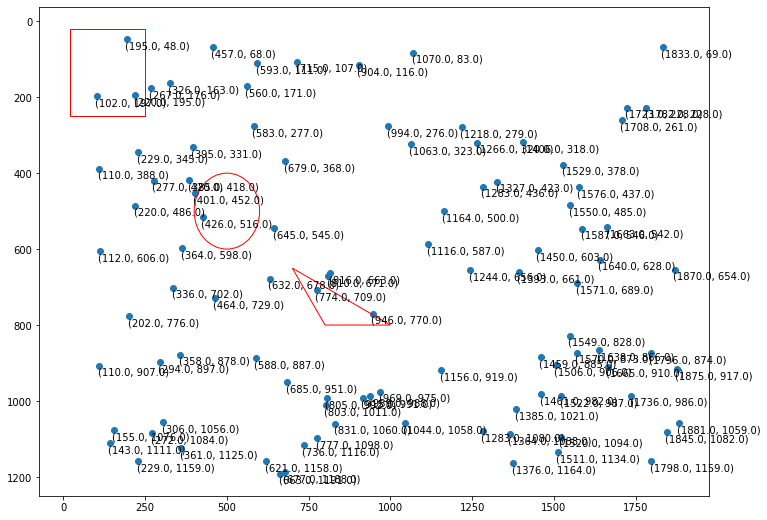

In [18]:
from transition_matrix import *

#Setting important variables
TEST_RADIUS = 100
TEST_VERTICES_1 = [[ 20,20] , [20,250],[250,250], [250,20]]
TEST_VERTICES_2 = [[800,800], [1000,800], [700,650]]


#An AOI dict having all the important areas of interest that will be used to calculate different metrics
TEST_AOI_DICT = {
                'aoi_poly1': PolyAOI(TEST_SCREENDIM,TEST_VERTICES_1),
                'aoi_circle2': CircleAOI(TEST_SCREENDIM, TEST_RADIUS, center=[500,500]),
                'aoi_poly2': PolyAOI(TEST_SCREENDIM,TEST_VERTICES_2)
                }

gz = GazeTransitions(TEST_SCREENDIM, TEST_AOI_DICT, GAZE_ARRAY)
print('The Gaze Transition Matrix\n',gz.get_transition_matrix(),'\n')
print('Number of Points outside all AOIs :',gz.points_outside_aoi)
for n,a in TEST_AOI_DICT.items():
    print('Probability of having Points in '+ n +': ',gz.get_prob_aoi(n))
print('Plot representation')
gz.plot_all(annotate_points=True)

# Entropy Metrics

For entropy two metrics will be calculated as mentioned in the Paper Krejtz et al., 2014

Gaze Transition Entropy:  

\begin{equation*}
    H_t =- \sum_i \pi_i \sum_j p_{ij}log p_{ij}
\end{equation*}

Gaze Stationary Entropy:

\begin{equation*}
    H_s =- \sum_i \pi_i log \pi_i
\end{equation*}

where  $p_{ij} = \frac{n_{ij}}{n}$  and $\pi_i = \frac{n_i}{n} $


 

In [15]:
print('Gaze Transition Entropy: ' , ec.GEntropy(TEST_AOI_DICT,'transition').compute())
print('Gaze Transition Probability Matrix')
print(ec.GEntropy(TEST_AOI_DICT,'transition').get_tranprobabilities())
print('Gaze Stationary Entropy: ' , ec.GEntropy(TEST_AOI_DICT,'stationary').compute())
print('Gaze Stationary Probability List',ec.GEntropy(TEST_AOI_DICT,'transition').get_stationary_prob())

Gaze Transition Entropy:  -0.0
Gaze Transition Probability Matrix
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Gaze Stationary Entropy:  0.2
Gaze Stationary Probability List [0.03, 0.01, 0.01]
